In [1]:
from train import *
import scanpy as sc

seed_all(0)

/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------- SEED ALL ---------------------------------- 
                           Seed Num :   0                                
---------------------------------- SEED ALL ---------------------------------- 


### read ST data

In [3]:
data_pth=[]
X_input=[]
for i in range(1,5):
    X = sc.read_h5ad(f'sample_data/section{i}.h5ad')
    if 'x' not in X.obs.columns:
        X.obs['x']=X.obs['col']
        X.obs['y']=X.obs['row']
    data_pth.append(f'sample_data/section{i}.h5ad')
    X.obs['name']=f'section{i}'
    X_input.append(X)
kneighbor = ['delaunay']*len(X_input)
input_identity = ['ST']*len(X_input)

save_dir = f"output/sample_data1/"


### train FuseMap model

In [4]:
network = main(X_input, save_dir, kneighbor, input_identity)

---------------------------------- Preprocess adata ----------------------------------
---------------------------------- Construct graph adata ----------------------------------
---------------------------------- Process graph adata ----------------------------------
number of genes in each section:[1009, 500, 855, 394], Number of all genes: 1747
---------------------------------- Phase 1. Pretrain FuseMap model ----------------------------------


  0%|          | 4/7496 [00:00<22:54,  5.45it/s]  

lambda_disc_single changed to 0.9403550378025809


  4%|▍         | 335/7496 [00:26<09:31, 12.54it/s]


KeyboardInterrupt: 

### read single-cell embedding

In [4]:
import scanpy as sc

save_dir = f"output/tutorial_test1/"


/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

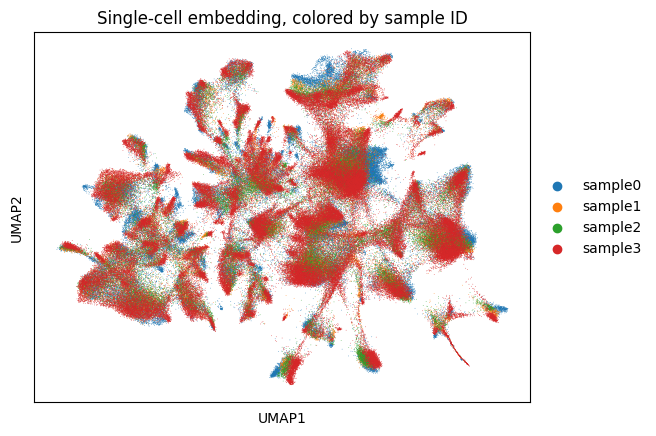

In [5]:
ad_embed=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Single-cell embedding, colored by sample ID')

/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Single-cell embedding, colored by sample ID')

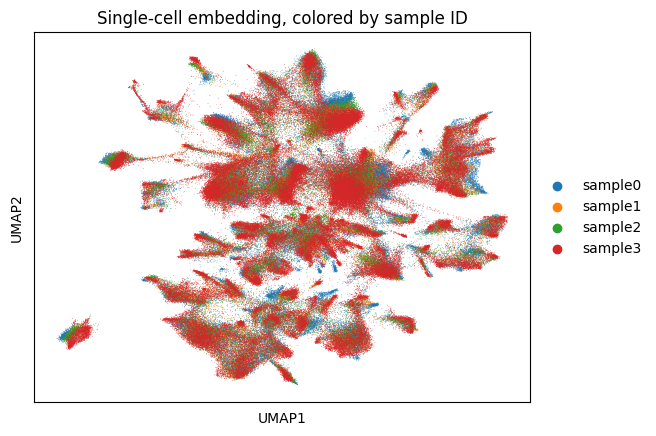

In [11]:
ad_embed=sc.read_h5ad(f'{save_dir}/ad_celltype_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)


ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Single-cell embedding, colored by sample ID')

### read spatial embedding

/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Spatial embedding, colored by sample ID')

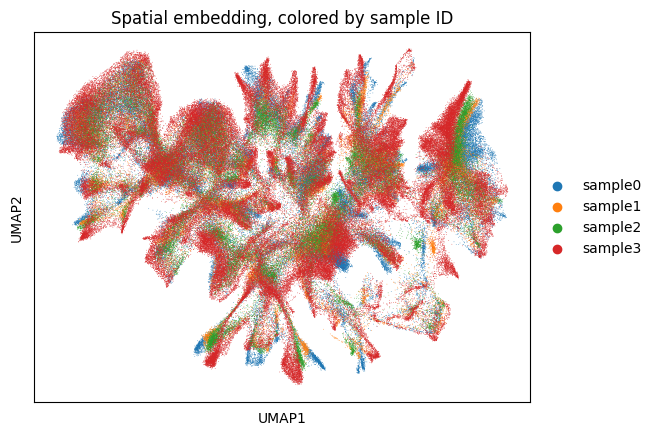

In [6]:
ad_embed=sc.read_h5ad(f'{save_dir}/ad_tissueregion_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)

ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Spatial embedding, colored by sample ID')


/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Spatial embedding, colored by sample ID')

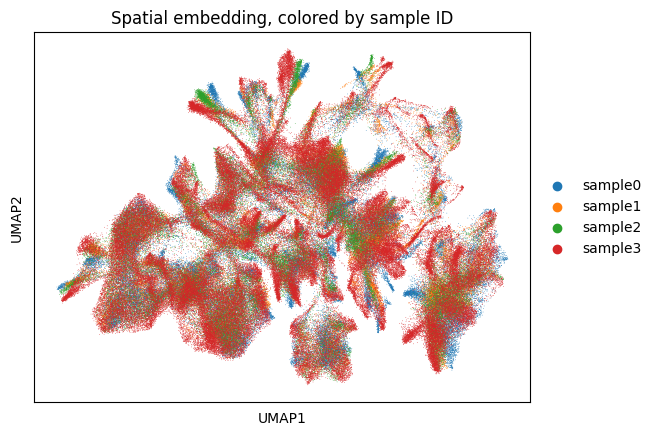

In [12]:
ad_embed=sc.read_h5ad(f'{save_dir}/ad_tissueregion_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)

ax = sc.pl.umap(ad_embed,color='batch',size=1, show=False)
ax.set_title('Spatial embedding, colored by sample ID')


### read gene embedding

Text(0.5, 1.0, 'Gene embedding, colored by sample ID')

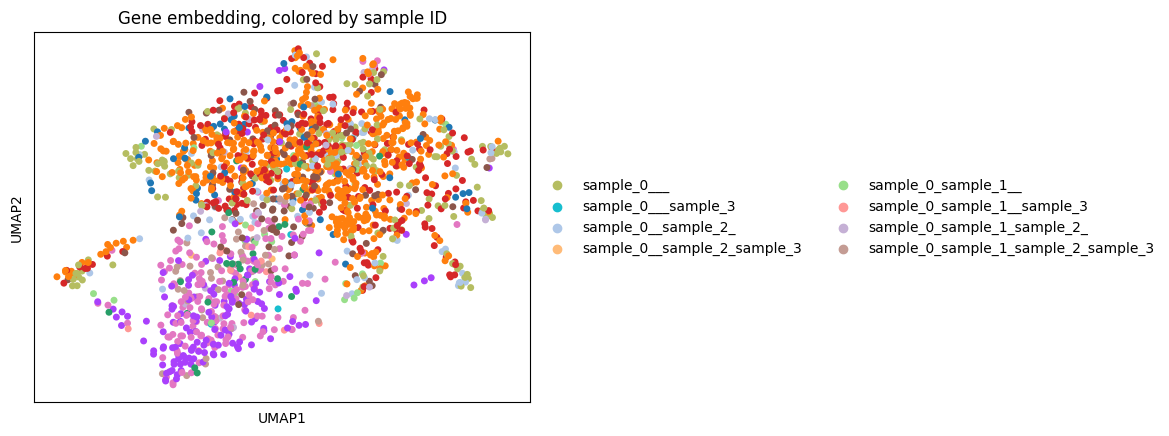

In [7]:
ad_embed=sc.read_h5ad(f'{save_dir}/ad_gene_embedding.h5ad')

sc.pp.neighbors(ad_embed, n_neighbors=50,use_rep='X')

sc.tl.umap(ad_embed)

ax = sc.pl.umap(ad_embed,color='type', size=100,show=False)
ax.set_title('Gene embedding, colored by sample ID')
